<a href="https://colab.research.google.com/github/IAT-ExploringAI-2024/Week-2_Data_Preprocessing/blob/main/Week_2_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



In this notebook, we'll explore of Artificial Intelligence Workflow, putting a spotlight on the crucial step of Data Preprocessing.

To make things clear, we'll showcase different types of data. This will help you recognize how various datasets look, where you can find them, and the steps to bring them into your work.

We'll also explore specific libraries tailored for each type of data. This way, you'll get hands-on experience with the tools designed to handle different data formats effectively.

After that, it's time to get hands-on with these datasets. We'll take a closer look at their unique features, understand whether they present classification or regression challenges, and use visualization techniques to make sense of the data's patterns. This practical approach not only hones your skills in data preprocessing but also empowers you to smoothly integrate various libraries and techniques into your AI workflow.




# **Artificial Intelligence Workflow**

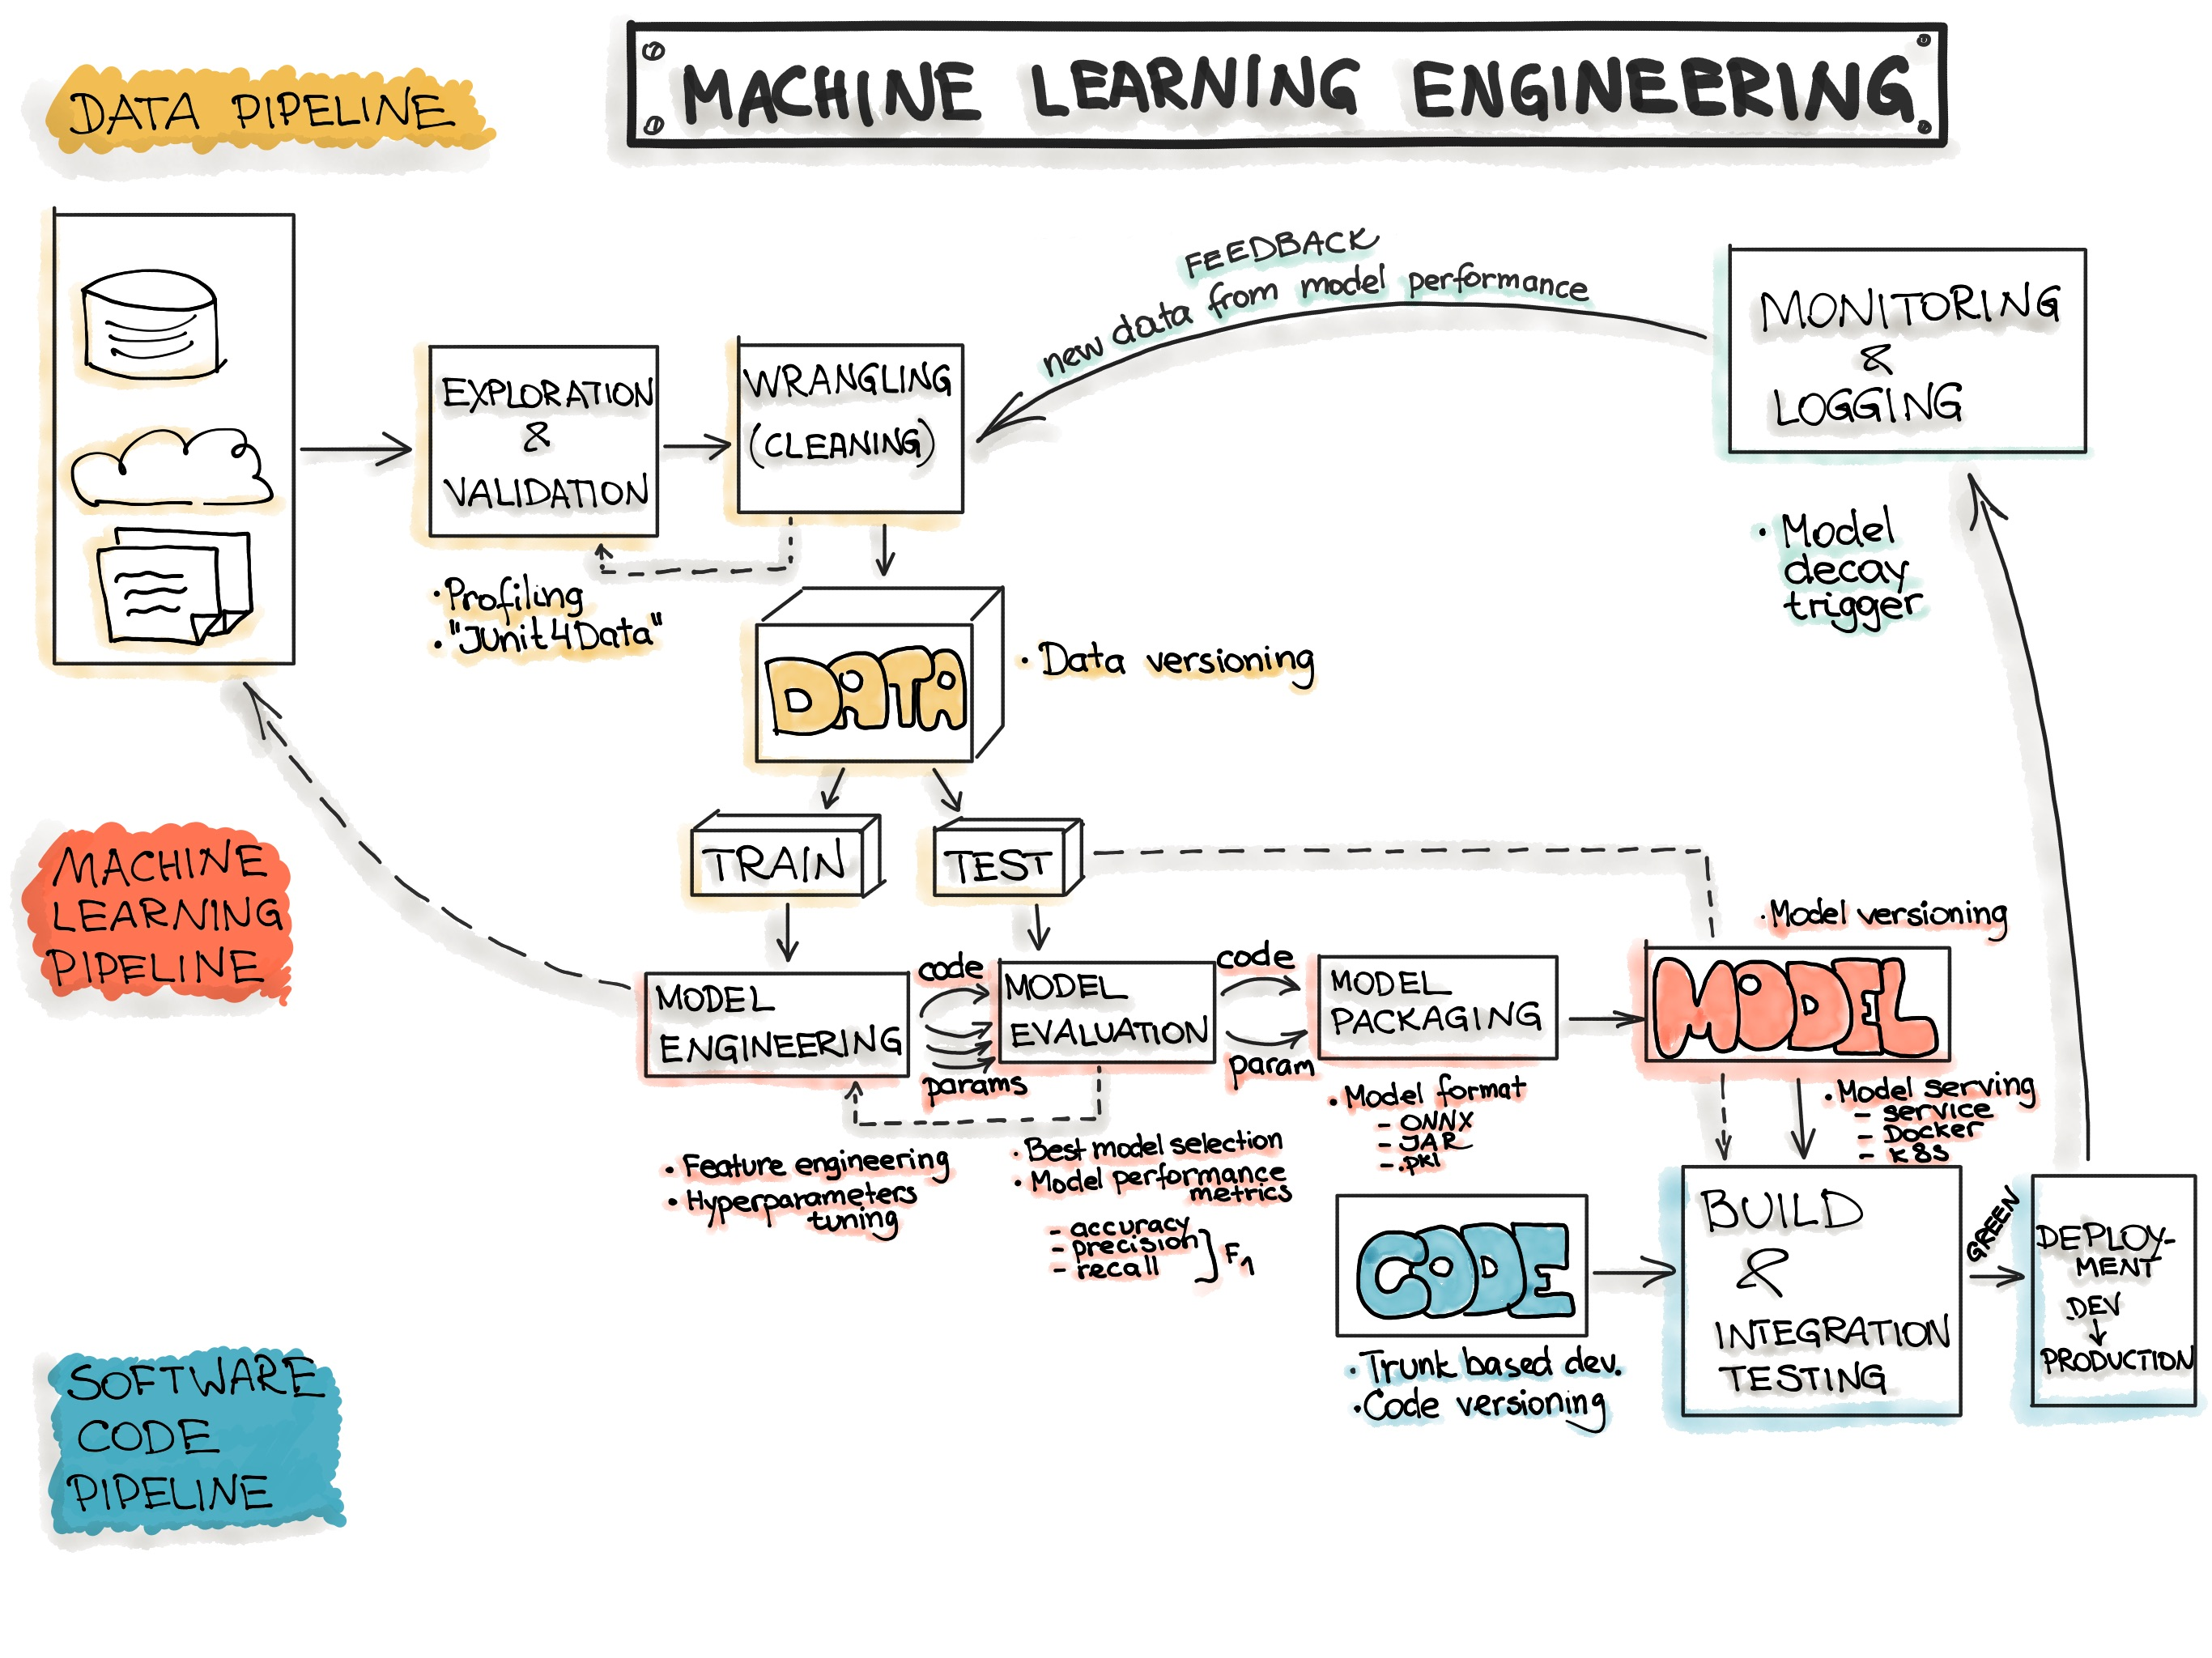

 **Three Main Steps**:

1.   Data Preprocessing
2.   Model Engineering
3.   Model Depolyment

**DATA Preprocessing**



*   Data Gathering/Integration
*   Data Exploration
*   Data Cleaning
*   Data Transforming


**Model Engineering**

*  Model Training
* Model Evaluation
* Model Testing


**Model Deployment**

* Model Serving
* Model Performance monitoring



# **Important Libraries**








**Libraries required for importing data**:

* Pandas



**Libraries required for visualizing data**:

* Matplotlib
* seaborn


**Libraries required for handling specific data types:**

* Numerical =>  Numpy
* Images =>  OpenCV
* Text =>  NLTK
* Audio =>  Librosa


In [1]:
import pandas

You cannot import libraries before installing them!

In [12]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install numpy
# !pip install opencv-python
# !pip install nltk
# !pip install librosa

Importing Libraries




In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import nltk
import librosa

## **Read SAVEE Dataset**

In [298]:
def extract_emotion(input_file):
    emotion_text = input_file.split("_")[1]
    emotion = re.split('(\d+)', emotion_text)[0]
    return emotion
#     print(emotion)

In [299]:
files_full = glob.glob("data/SAVEE/*.wav")
files = [os.path.basename(file) for file in files_full]

gender = ['male' for x in files]
speaker = [x[0:2] for x in files]
emotion = [extract_emotion(x) for x in files]

emotion_dict = {
    "a": "anger", 
    "d": "disgust",
    "f": "fear",
    "h": "happiness",
    "sa": "sadness",
    "su": "surprise",
    "n": "neutral",
}

emotion = [emotion_dict.get(item,item)  for item in emotion]
# emotion
files

df_dict = {'speaker': speaker, 'gender': gender, 'emotion': emotion, 'file': files, 'full_path': files_full} 
    
SAVEE_df = pd.DataFrame(df_dict)
SAVEE_df['dataset'] = 'SAVEE'

In [300]:
SAVEE_df

,speaker,gender,emotion,file,full_path,dataset
0,JK,male,sadness,JK_sa01.wav,data/SAVEE/JK_sa01.wav,SAVEE
1,JK,male,sadness,JK_sa15.wav,data/SAVEE/JK_sa15.wav,SAVEE
2,DC,male,neutral,DC_n13.wav,data/SAVEE/DC_n13.wav,SAVEE
3,DC,male,surprise,DC_su09.wav,data/SAVEE/DC_su09.wav,SAVEE
4,DC,male,neutral,DC_n07.wav,data/SAVEE/DC_n07.wav,SAVEE
...,...,...,...,...,...,...
475,JE,male,anger,JE_a01.wav,data/SAVEE/JE_a01.wav,SAVEE
476,JE,male,anger,JE_a15.wav,data/SAVEE/JE_a15.wav,SAVEE
477,DC,male,neutral,DC_n22.wav,data/SAVEE/DC_n22.wav,SAVEE
478,DC,male,surprise,DC_su04.wav,data/SAVEE/DC_su04.wav,SAVEE


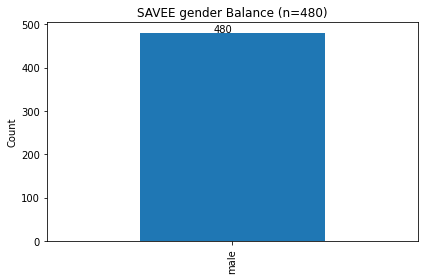

In [443]:
SAVEE_df['gender'].value_counts(sort=True).plot.bar()

# Add value labels on top of bars
xlocs=[i+1 for i in range(0,len(SAVEE_df['gender'].value_counts(sort=True)))]
for i, v in enumerate(SAVEE_df['gender'].value_counts(sort=True)):
    plt.text(xlocs[i] - 1.05, v + 2, str(v))

# plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('SAVEE gender Balance' + ' (n=' + str(len(SAVEE_df)) + ')')
    
# plt.show()
plt.tight_layout()
plt.savefig('output/SAVEE_Gender_Balance.jpg', dpi=300)

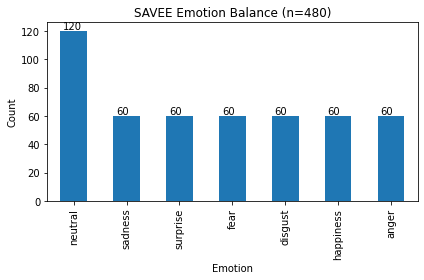

In [436]:
SAVEE_df['emotion'].value_counts(sort=True).plot.bar()

# Add value labels on top of bars
xlocs=[i+1 for i in range(0,len(SAVEE_df['emotion'].value_counts(sort=True)))]
for i, v in enumerate(SAVEE_df['emotion'].value_counts(sort=True)):
    plt.text(xlocs[i] - 1.2, v + 1, str(v))

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('SAVEE Emotion Balance' + ' (n=' + str(len(SAVEE_df)) + ')')
    
# plt.show()
plt.tight_layout()
plt.savefig('output/SAVEE_Emotion_Balance.jpg', dpi=300)

## **Read TESS Dataset**

In [303]:
def extract_emotion_TESS(input_file):
    emotion_text = input_file.split("_")[2]
    emotion = emotion_text.split(".")[0]
    return emotion
#     print(emotion)

In [304]:
files_full = glob.glob("data/TESS/*/*.wav")
files = [os.path.basename(file) for file in files_full]
files

gender = ['female' for x in files]
speaker = [x[0:3] for x in files]
emotion = [extract_emotion_TESS(x) for x in files]

emotion_dict = {
    "angry": "anger", 
    "disgust": "disgust",
    "fear": "fear",
    "happy": "happiness",
    "sad": "sadness",
    "ps": "surprise",
    "neutral": "neutral",
}

emotion = [emotion_dict.get(item,item)  for item in emotion]
# emotion
files

df_dict = {'speaker': speaker, 'gender': gender, 'emotion': emotion, 'file': files, 'full_path': files_full} 
    
TESS_df = pd.DataFrame(df_dict)
TESS_df['dataset'] = 'TESS'

In [305]:
TESS_df

,speaker,gender,emotion,file,full_path,dataset
0,YAF,female,disgust,YAF_date_disgust.wav,data/TESS/YAF_disgust/YAF_date_disgust.wav,TESS
1,YAF,female,disgust,YAF_rag_disgust.wav,data/TESS/YAF_disgust/YAF_rag_disgust.wav,TESS
2,YAF,female,disgust,YAF_raise_disgust.wav,data/TESS/YAF_disgust/YAF_raise_disgust.wav,TESS
3,YAF,female,disgust,YAF_ditch_disgust.wav,data/TESS/YAF_disgust/YAF_ditch_disgust.wav,TESS
4,YAF,female,disgust,YAF_door_disgust.wav,data/TESS/YAF_disgust/YAF_door_disgust.wav,TESS
...,...,...,...,...,...,...
2795,OAF,female,sadness,OAF_tool_sad.wav,data/TESS/OAF_Sad/OAF_tool_sad.wav,TESS
2796,OAF,female,sadness,OAF_goose_sad.wav,data/TESS/OAF_Sad/OAF_goose_sad.wav,TESS
2797,OAF,female,sadness,OAF_met_sad.wav,data/TESS/OAF_Sad/OAF_met_sad.wav,TESS
2798,OAF,female,sadness,OAF_pearl_sad.wav,data/TESS/OAF_Sad/OAF_pearl_sad.wav,TESS


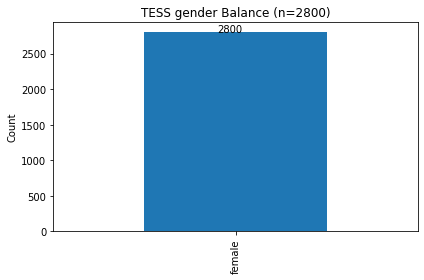

In [444]:
TESS_df['gender'].value_counts(sort=True).plot.bar()

# Add value labels on top of bars
xlocs=[i+1 for i in range(0,len(TESS_df['gender'].value_counts(sort=True)))]
for i, v in enumerate(TESS_df['gender'].value_counts(sort=True)):
    plt.text(xlocs[i] - 1.05, v + 3, str(v))

# plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('TESS gender Balance' + ' (n=' + str(len(TESS_df)) + ')')
    
# plt.show()
plt.tight_layout()
plt.savefig('output/TESS_Gender_Balance.jpg', dpi=300)

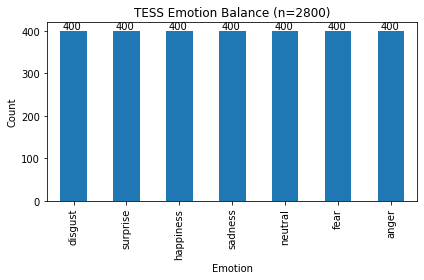

In [438]:
TESS_df['emotion'].value_counts(sort=True).plot.bar()

# Add value labels on top of bars
xlocs=[i+1 for i in range(0,len(TESS_df['emotion'].value_counts(sort=True)))]
for i, v in enumerate(TESS_df['emotion'].value_counts(sort=True)):
    plt.text(xlocs[i] - 1.2, v + 3, str(v))

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('TESS Emotion Balance' + ' (n=' + str(len(TESS_df)) + ')')
    
# plt.show()
plt.tight_layout()
plt.savefig('output/TESS_Emotion_Balance.jpg', dpi=300)

## **Read RAVDESS Dataset**

In [308]:
files_full = glob.glob("data/RAVDESS/*/*.wav")
files = [os.path.basename(file) for file in files_full]
files

# emotion=emotions[(file_name.split("-")[2])]
speaker = [x.split("-")[6].split(".")[0] for x in files]
gender = ['female' if int(x)%2 == 0 else 'male' for x in speaker]

# emotion = [extract_emotion_TESS(x) for x in files]

# emotion_dict = {
#     "a": "anger", 
#     "d": "disgust",
#     "f": "fear",
#     "h": "happiness",
#     "sa": "sadness",
#     "ps": "surprise",
#     "n": "neutral",
# }

emotion_dict ={
  '01':'neutral',
  '02':'calm',
  '03':'happiness',
  '04':'sadness',
  '05':'anger',
  '06':'fear',
  '07':'disgust',
  '08':'surprise'
}

emotion = [x.split("-")[2] for x in files]
emotion = [emotion_dict.get(item,item)  for item in emotion]
# emotion

df_dict = {'speaker': speaker, 'gender': gender, 'emotion': emotion, 'file': files, 'full_path': files_full} 
RAVDESS_df = pd.DataFrame(df_dict)
RAVDESS_df['dataset'] = 'RAVDESS'

In [309]:
RAVDESS_df

,speaker,gender,emotion,file,full_path,dataset
0,16,female,anger,03-01-05-01-02-01-16.wav,data/RAVDESS/Actor_16/03-01-05-01-02-01-16.wav,RAVDESS
1,16,female,fear,03-01-06-01-02-02-16.wav,data/RAVDESS/Actor_16/03-01-06-01-02-02-16.wav,RAVDESS
2,16,female,fear,03-01-06-02-01-02-16.wav,data/RAVDESS/Actor_16/03-01-06-02-01-02-16.wav,RAVDESS
3,16,female,anger,03-01-05-02-01-01-16.wav,data/RAVDESS/Actor_16/03-01-05-02-01-01-16.wav,RAVDESS
4,16,female,disgust,03-01-07-01-01-01-16.wav,data/RAVDESS/Actor_16/03-01-07-01-01-01-16.wav,RAVDESS
...,...,...,...,...,...,...
1430,08,female,happiness,03-01-03-02-02-02-08.wav,data/RAVDESS/Actor_08/03-01-03-02-02-02-08.wav,RAVDESS
1431,08,female,happiness,03-01-03-01-01-02-08.wav,data/RAVDESS/Actor_08/03-01-03-01-01-02-08.wav,RAVDESS
1432,08,female,calm,03-01-02-02-01-01-08.wav,data/RAVDESS/Actor_08/03-01-02-02-01-01-08.wav,RAVDESS
1433,08,female,calm,03-01-02-01-02-01-08.wav,data/RAVDESS/Actor_08/03-01-02-01-02-01-08.wav,RAVDESS


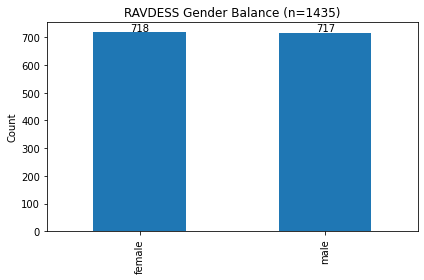

In [445]:
RAVDESS_df['gender'].value_counts(sort=True).plot.bar()

# Add value labels on top of bars
xlocs=[i+1 for i in range(0,len(RAVDESS_df['gender'].value_counts(sort=True)))]
for i, v in enumerate(RAVDESS_df['gender'].value_counts(sort=True)):
    plt.text(xlocs[i] - 1.05, v + 3.65, str(v))

# plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('RAVDESS Gender Balance' + ' (n=' + str(len(RAVDESS_df)) + ')')

# plt.show()
plt.tight_layout()
plt.savefig('output/RAVDESS_Gender_Balance.jpg', dpi=300)

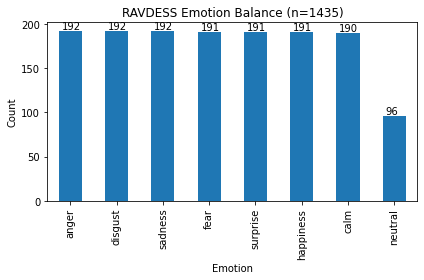

In [440]:
RAVDESS_df['emotion'].value_counts(sort=True).plot.bar()

# Add value labels on top of bars
xlocs=[i+1 for i in range(0,len(RAVDESS_df['emotion'].value_counts(sort=True)))]
for i, v in enumerate(RAVDESS_df['emotion'].value_counts(sort=True)):
    plt.text(xlocs[i] - 1.19, v + 1.5, str(v))

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('RAVDESS Emotion Balance' + ' (n=' + str(len(RAVDESS_df)) + ')')
    
# plt.show()
plt.tight_layout()
plt.savefig('output/RAVDESS_Emotion_Balance.jpg', dpi=300)

## **Merge Datasets**

In [325]:
merged_dataset = pd.concat([SAVEE_df, TESS_df, RAVDESS_df])
merged_dataset

,speaker,gender,emotion,file,full_path,dataset
0,JK,male,sadness,JK_sa01.wav,data/SAVEE/JK_sa01.wav,SAVEE
1,JK,male,sadness,JK_sa15.wav,data/SAVEE/JK_sa15.wav,SAVEE
2,DC,male,neutral,DC_n13.wav,data/SAVEE/DC_n13.wav,SAVEE
3,DC,male,surprise,DC_su09.wav,data/SAVEE/DC_su09.wav,SAVEE
4,DC,male,neutral,DC_n07.wav,data/SAVEE/DC_n07.wav,SAVEE
...,...,...,...,...,...,...
1430,08,female,happiness,03-01-03-02-02-02-08.wav,data/RAVDESS/Actor_08/03-01-03-02-02-02-08.wav,RAVDESS
1431,08,female,happiness,03-01-03-01-01-02-08.wav,data/RAVDESS/Actor_08/03-01-03-01-01-02-08.wav,RAVDESS
1432,08,female,calm,03-01-02-02-01-01-08.wav,data/RAVDESS/Actor_08/03-01-02-02-01-01-08.wav,RAVDESS
1433,08,female,calm,03-01-02-01-02-01-08.wav,data/RAVDESS/Actor_08/03-01-02-01-02-01-08.wav,RAVDESS


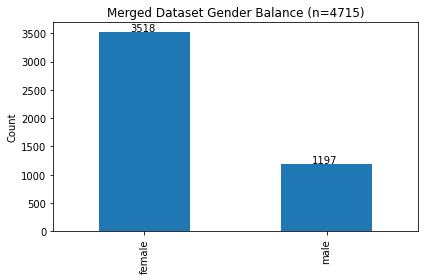

In [454]:
merged_dataset['gender'].value_counts(sort=True).plot.bar()

# Add value labels on top of bars
xlocs=[i+1 for i in range(0,len(merged_dataset['gender'].value_counts(sort=True)))]
for i, v in enumerate(merged_dataset['gender'].value_counts(sort=True)):
    plt.text(xlocs[i] - 1.08, v + 16, str(v))

# plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Merged Dataset Gender Balance' + ' (n=' + str(len(merged_dataset)) + ')')

# plt.show()
plt.tight_layout()
plt.savefig('output/Merged_Gender_Balance.jpg', dpi=300)

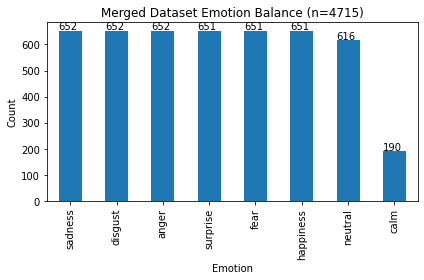

In [453]:
merged_dataset['emotion'].value_counts(sort=True).plot.bar()

# Add value labels on top of bars
xlocs=[i+1 for i in range(0,len(merged_dataset['emotion'].value_counts(sort=True)))]
for i, v in enumerate(merged_dataset['emotion'].value_counts(sort=True)):
    plt.text(xlocs[i] - 1.25, v + 6, str(v))

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Merged Dataset Emotion Balance' + ' (n=' + str(len(merged_dataset)) + ')')
    
# plt.show()
plt.tight_layout()
plt.savefig('output/Merged_Emotion_Balance.jpg', dpi=300)

## **Balance merged Dataset**

In [384]:
# Since there is a veru large number of females in the TESS dataset. We only select 480 samples from
# the TESS dataset in order to match the 480 males from the SAVEE dataset.

emotions = list(set(merged_dataset['emotion']))
# calm emotion not in TESS dataset
emotions.remove("calm")

TESS_data = merged_dataset[merged_dataset['dataset'] == 'TESS']
filtered_merged_dataset = merged_dataset[merged_dataset['dataset'] != 'TESS']

speakers = list(set(TESS_data['speaker']))

for speaker in speakers:
    for emotion in emotions:
        filtered_TESS_data = TESS_data[(TESS_data['speaker'] == speaker) & (TESS_data['emotion'] == emotion)]
        # randomly select 480/2/7 = 34
        # 480: How many samples we need to match MALE count from SAVEE dataset
        # 2: Select equally for each of the subjects
        # 7: Select equally for each emotion
        randomly_selected = filtered_TESS_data.sample(n=34)
        filtered_merged_dataset = pd.concat([filtered_merged_dataset, randomly_selected])
        
#balanced dataset we will work with
filtered_merged_dataset = filtered_merged_dataset.reset_index()
filtered_merged_dataset

,index,speaker,gender,emotion,file,full_path,dataset
0,0,JK,male,sadness,JK_sa01.wav,data/SAVEE/JK_sa01.wav,SAVEE
1,1,JK,male,sadness,JK_sa15.wav,data/SAVEE/JK_sa15.wav,SAVEE
2,2,DC,male,neutral,DC_n13.wav,data/SAVEE/DC_n13.wav,SAVEE
3,3,DC,male,surprise,DC_su09.wav,data/SAVEE/DC_su09.wav,SAVEE
4,4,DC,male,neutral,DC_n07.wav,data/SAVEE/DC_n07.wav,SAVEE
...,...,...,...,...,...,...,...
2386,109,YAF,female,disgust,YAF_bite_disgust.wav,data/TESS/YAF_disgust/YAF_bite_disgust.wav,TESS
2387,199,YAF,female,disgust,YAF_goose_disgust.wav,data/TESS/YAF_disgust/YAF_goose_disgust.wav,TESS
2388,178,YAF,female,disgust,YAF_void_disgust.wav,data/TESS/YAF_disgust/YAF_void_disgust.wav,TESS
2389,34,YAF,female,disgust,YAF_beg_disgust.wav,data/TESS/YAF_disgust/YAF_beg_disgust.wav,TESS


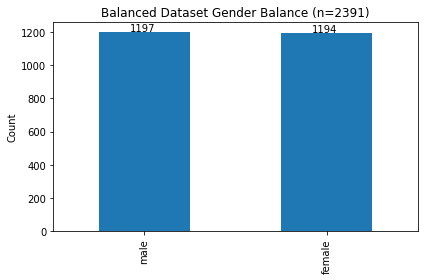

In [451]:
filtered_merged_dataset['gender'].value_counts(sort=False).plot.bar()

# Add value labels on top of bars
xlocs=[i+1 for i in range(0,len(filtered_merged_dataset['gender'].value_counts(sort=False)))]
for i, v in enumerate(filtered_merged_dataset['gender'].value_counts(sort=False)):
    plt.text(xlocs[i] - 1.08, v + 6.5, str(v))

# plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Balanced Dataset Gender Balance' + ' (n=' + str(len(filtered_merged_dataset)) + ')')

# plt.show()
plt.tight_layout()
plt.savefig('output/Merged_Balanced_Gender_Balance.jpg', dpi=300)

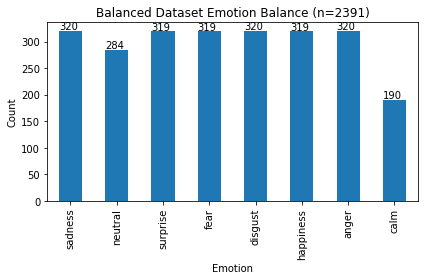

In [450]:
filtered_merged_dataset['emotion'].value_counts(sort=False).plot.bar()

# Add value labels on top of bars
xlocs=[i+1 for i in range(0,len(filtered_merged_dataset['emotion'].value_counts(sort=False)))]
for i, v in enumerate(filtered_merged_dataset['emotion'].value_counts(sort=False)):
    plt.text(xlocs[i] - 1.25, v + 3, str(v))

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Balanced Dataset Emotion Balance' + ' (n=' + str(len(filtered_merged_dataset)) + ')')
    
# plt.show()
plt.tight_layout()
plt.savefig('output/Merged_Balanced_Emotion_Balance.jpg', dpi=300)

## **Cleaning Merged Dataset**

In [387]:
# Check if there are any unaccounted for values
print(list(set(filtered_merged_dataset['gender'])))
print(list(set(filtered_merged_dataset['emotion'])))

['female', 'male']
['neutral', 'surprise', 'anger', 'calm', 'sadness', 'happiness', 'fear', 'disgust']


## **Analysis**

In [457]:
from pydub import AudioSegment

In [ ]:
pad_ms = 8000  # Add here the fix length you want (in milliseconds)
audio = AudioSegment.from_wav('you-wav-file.wav')
assert pad_ms > len(audio), "Audio was longer that 1 second. Path: " + str(full_path)
silence = AudioSegment.silent(duration=pad_ms-len(audio)+1)


padded = audio + silence  # Adding silence after the audio
padded.export('padded-file.wav', format='wav')

In [388]:
import librosa

def feature_chromagram(waveform, sample_rate):
    # STFT computed here explicitly; mel spectrogram and MFCC functions do this under the hood
    stft_spectrogram=np.abs(librosa.stft(waveform))
    #print(stft_spectrogram.shape)
    # Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    #print(chromagram.shape)
    return chromagram

def feature_melspectrogram(waveform, sample_rate):
    # Produce the mel spectrogram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # Using 8khz as upper frequency bound should be enough for most speech classification tasks
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000).T,axis=0)
    return melspectrogram

def feature_mfcc(waveform, sample_rate):
    # Compute the MFCCs for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # 40 filterbanks = 40 coefficients
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfc_coefficients

In [389]:
def get_features(file):
    
    # Pad audio to 8s
    pad_ms = 8000  # Add here the fix length you want (in milliseconds)
    audio = AudioSegment.from_wav(file)
    assert pad_ms > len(audio), "Audio was longer that 8 second. Path: " + str(full_path)
    silence = AudioSegment.silent(duration=pad_ms-len(audio)+1)

    padded = audio + silence  # Adding silence after the audio
    padded.export('padded-file.wav', format='wav')
    
    # load an individual soundfile
     with soundfile.SoundFile('padded-file.wav') as audio:
        waveform = audio.read(dtype="float32")
        sample_rate = audio.samplerate
        # compute features of soundfile
        chromagram = feature_chromagram(waveform, sample_rate)
        melspectrogram = feature_melspectrogram(waveform, sample_rate)
        mfc_coefficients = feature_mfcc(waveform, sample_rate)
        feature_matrix=np.array([])

        # use np.hstack to stack our feature arrays horizontally to create a feature matrix
        feature_matrix = np.hstack((chromagram, melspectrogram, mfc_coefficients))

        return feature_matrix

In [408]:
import os, glob

def load_data():
    X,y=[],[]
    count = 0
    files = filtered_merged_dataset['full_path']
    emotions = filtered_merged_dataset['emotion']
    y = emotions
    for file in files:
        features = get_features(file)
        X.append(features)
        # '\r' + end='' results in printing over same line
        count = count+1
        print('\r' + f' Processed {count}/{2391} audio samples',end=' ')
    return np.array(X), np.array(y)

In [410]:
features, emotions = load_data()

 Processed 2391/2391 audio samples 

In [412]:
print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features) # make it pretty for display
features_df


Audio samples represented: 2391
Numerical features extracted per sample: 180


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.615580,0.563950,0.549692,0.581877,0.655620,0.662756,0.632306,0.625282,0.661253,0.645660,...,1.043494,1.139894,0.358631,0.599615,0.318476,-0.203785,1.645893,3.093149,2.120080,0.520745
1,0.679746,0.635813,0.591451,0.607200,0.631385,0.641622,0.639708,0.651372,0.683633,0.734292,...,1.540109,1.570881,1.943887,1.774535,1.433108,1.523536,1.792784,2.923024,3.145004,1.452775
2,0.702837,0.708426,0.684022,0.648639,0.652478,0.643013,0.580393,0.565113,0.552285,0.622054,...,0.341424,0.846096,2.885672,1.135524,0.045581,1.027317,1.138043,1.462051,1.462684,1.484937
3,0.610602,0.561682,0.520230,0.532284,0.552935,0.583363,0.601917,0.633930,0.675511,0.684215,...,-0.524789,1.755825,5.293946,3.697515,2.265866,4.535465,5.906407,6.214412,7.220405,6.763476
4,0.702973,0.656843,0.635179,0.628033,0.663388,0.662392,0.581200,0.563470,0.576573,0.634710,...,-0.144909,1.303543,2.747535,1.222743,0.037704,0.525343,1.525196,2.005650,1.281761,1.138556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,0.640386,0.574166,0.587596,0.587722,0.646222,0.730592,0.676073,0.618278,0.590876,0.584882,...,3.058502,2.467014,4.498106,3.637449,1.399140,5.948811,0.895177,4.120583,2.602886,2.881105
2387,0.545128,0.561853,0.559597,0.506866,0.514943,0.561938,0.553634,0.537188,0.496208,0.496047,...,4.849442,-0.643944,2.157845,1.938762,-0.463667,4.208619,0.124725,4.157450,2.449101,2.604148
2388,0.519444,0.511371,0.529228,0.512594,0.547612,0.573669,0.538783,0.482785,0.498621,0.529562,...,3.301432,4.107717,3.383968,4.053128,0.640818,7.289026,2.494200,4.245471,1.869417,2.225909
2389,0.563341,0.566727,0.615773,0.681984,0.622872,0.595020,0.574781,0.543887,0.529434,0.528511,...,3.873062,1.580050,6.177414,3.424117,3.313638,6.322120,-0.207811,5.044658,-0.954214,2.454793


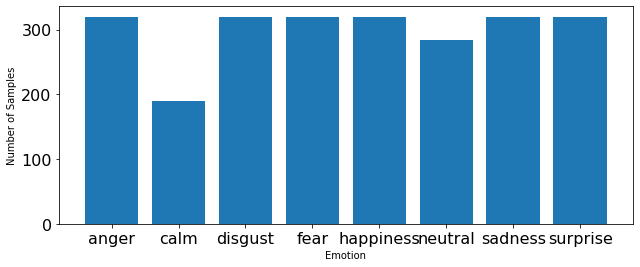

In [413]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(emotions, return_counts=True)
plt.bar(x=range(8), height=count)
plt.xticks(ticks=range(8), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

In [414]:
# We would usually use df.describe(), but it provides a bit of a mess of information we don't need at the moment.
def print_features(df):
    # Check chromagram feature values
    features_df_chromagram = df.loc[:,:11]
    chroma_min = features_df_chromagram.min().min()
    chroma_max = features_df_chromagram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    chroma_mean = features_df_chromagram.stack().mean()
    chroma_stdev = features_df_chromagram.stack().std()
    print(f'12 Chromagram features:       \
    min = {chroma_min:.3f}, \
    max = {chroma_max:.3f}, \
    mean = {chroma_mean:.3f}, \
    deviation = {chroma_stdev:.3f}')

    # Check mel spectrogram feature values
    features_df_melspectrogram = df.loc[:,12:139]
    mel_min = features_df_melspectrogram.min().min()
    mel_max = features_df_melspectrogram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mel_mean = features_df_melspectrogram.stack().mean()
    mel_stdev = features_df_melspectrogram.stack().std()
    print(f'\n128 Mel Spectrogram features: \
    min = {mel_min:.3f}, \
    max = {mel_max:.3f}, \
    mean = {mel_mean:.3f}, \
    deviation = {mel_stdev:.3f}')

    # Check MFCC feature values
    features_df_mfcc = df.loc[:,140:179]
    mfcc_min = features_df_mfcc.min().min()
    mfcc_max = features_df_mfcc.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mfcc_mean = features_df_mfcc.stack().mean()
    mfcc_stdev = features_df_mfcc.stack().std()
    print(f'\n40 MFCC features:             \
    min = {mfcc_min:.3f},\
    max = {mfcc_max:.3f},\
    mean = {mfcc_mean:.3f},\
    deviation = {mfcc_stdev:.3f}')

print_features(features_df)

12 Chromagram features:           min = 0.173,     max = 0.932,     mean = 0.618,     deviation = 0.114

128 Mel Spectrogram features:     min = 0.000,     max = 1005.190,     mean = 1.326,     deviation = 12.153

40 MFCC features:                 min = -873.242,    max = 169.425,    mean = -11.454,    deviation = 88.742


In [415]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
features_scaled = features
features_scaled = scaler.fit_transform(features_scaled)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
features_minmax = features
features_minmax = scaler.fit_transform(features_minmax)

print('\033[1m'+'Standard Scaling:\n'+'\033[0m')
features_scaled_df = pd.DataFrame(features_scaled)
print_features(features_scaled_df)

print('\n\n\033[1m'+'MinMax Scaling:\n'+'\033[0m')
features_minmax_df = pd.DataFrame(features_minmax)
print_features(features_minmax_df)

Standard Scaling:

12 Chromagram features:           min = -4.163,     max = 2.642,     mean = 0.000,     deviation = 1.000

128 Mel Spectrogram features:     min = -0.390,     max = 44.263,     mean = 0.000,     deviation = 1.000

40 MFCC features:                 min = -4.446,    max = 10.018,    mean = 0.000,    deviation = 1.000


MinMax Scaling:

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.627,     deviation = 0.176

128 Mel Spectrogram features:     min = 0.000,     max = 1.000,     mean = 0.014,     deviation = 0.056

40 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.373,    deviation = 0.187


## **Audio Data**

<center><h1> Introduction to Audio Data Analysis </h1></center>


As a first step towards Speech Emotion Recognition, this notebook serves as an introduction to data cleaning and feature engineering techniques for audio data.In the next notebooks, we will delve into various Machine learning algorithms to develop models to perform classification.

Data cleansing and feature engineering comprise the most crucial aspect of preparing machine and deep learning models alike and is often the difference between success and failure. We can drastically improve the performance of a model with proper attention paid to feature engineering.
For features to be useful in classification they must encompass sufficient variance between different classes.

**Introduction to RAVDESS dataset**

We are going to use the RAVDESS dataset (Ryerson Audio-Visual Database of Emotional Speech and Song dataset), created by Steven Livingstone and Frank Russo of Ryerson University. <br>
**Files**
This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

* Vocal channel (01 = speech, 02 = song).

* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

* Repetition (01 = 1st repetition, 02 = 2nd repetition).

* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 03-01-06-01-02-01-12.wav

1. Audio-only (03)
2. Speech (01)
3. Fearful (06)
4. Normal intensity (01)
5. Statement "dogs" (02)
6. 1st Repetition (01)
7. 12th Actor (12) Female, as the actor ID number is even.

[Details of the RAVDESS dataset](https://psychlabs.torontomu.ca/smartlab/resources/speech-song-database-ravdess/) <br>


The above link has some problems with the dataset,so i cleaned it a bit and you can access it and download it from [this link](https://drive.google.com/drive/folders/1OxhaA7DuOc7UYJZIajFlgshvdWDTLBqy?usp=sharing)

We're going to use the audio-only speech portion of the RAVDESS dataset, ~200MB.
Audio is sourced from 24 actors (12 male, 12 female) repeating two sentences with
a variety of emotions and intensity. We get 1440 speech files (24 actors * 60 recordings per actor). Each audio sample has been rated  by a human 10 times for emotional quality.

### Machine Learning Process Overview
1. Feature Engineering: Choose and define the properties which our model will use to evaluate the audio files. <br>
2. Feature Extraction: Compute the features for each audio file and build a feature matrix representing all audio files. <br>
3. Model exploration: Test candidate models that make sense for the properies of the dataset
4. Training the MLP Classifier model: Choose and optimize the properties of our model on validation data - hyperparameters and architechture.  <br>
5. Evaluate our model's performance: Evaluate our model's accuracy on validation data and score it against test data which it has never seen in training.<br>
6. Explore options for improving our model: Is our dataset the right size? Is our model too complex or too simple? <br>

*In this notebook, we are going to focus on first two steps of the process.*
1. *Feature Engineering*
2. *Feature Extraction*

### Feature Engineering
Before building any sort of predictive models, we not only need data - but we need a usable representation. Enter feature engineering.

An audio file can be represented as a time series with the dependent axis being
the amplitude of the audio waveform. The waveform of the sound file is all the information we have with which to create features to train our model. However, the shape of a waveform does not carry enough discriminating information, so we need to transform the waveform into a more useable form. <br>
Sometimes our input dataset _does_ have enough information to train a model to give accurate results - but even then input data should be scrutinized and transformed - this allows us to pick the best model for our features, which is usually much better and different than a model that works on our raw input data.  Proper feature engineering carries advantages not limited to

 - **More accurate, generalizable models**
 - **Insight into model's decision-making behaviour**
 - **Flexibility in choice of models**
 - **Faster training**

**Before feature engineering, we always cleanse our data** - which may consist of removing outliers (carefully), removing irrelevant input data according to business logic, or removing noise. For audio, data cleaning may consistent of making audio samples equal in length and padded with silence at either end. The RAVDESS dataset has done that for us, but this is a rare case.

That being said, let's see what we're starting with by comparing the waveforms of "Happy" and "Angry" of Actor 1:

In [458]:
# Get the critical imports out of the way
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')
from IPython.core.display import HTML
# Center matplotlib figures...
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

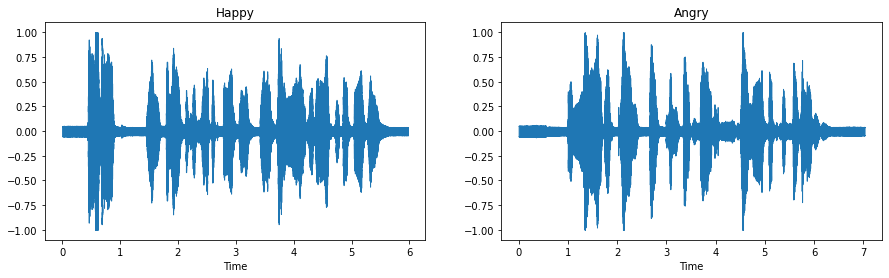

In [459]:
################# Load Happy and Angry example of Actor 1 #####################################
with soundfile.SoundFile('data/SAVEE/DC_h11.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Happy')

with soundfile.SoundFile('data/SAVEE/JE_a14.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Angry')

Alright, there's a visible difference - but not enough to classify by emotion. Take my word for it. Try it if you like. However, raw waveforms can be used for certain other audio classification tasks with the right network.

So, where do we get features suitable for emotion classification?
### Short-Time Fourier Transform
The lowest-hanging fruit in time series signal processing is, of course, the Fourier Transform.
Specifically, we'll use the Short-Time Fourier Transform (STFT) which will cut our audio waveform into short, overlapping equal length segments and
take the Fourier transform of each segment individually to produce multiple power spectrograms, identifying resonant frequencies present in our audio file. The major advantage of STFT is better resolution of _changes_ in the audio signal w.r.t. time. <br>

If you want to explore Fourier transform please look into [this article.](https://medium.com/@ongzhixuan/exploring-the-short-time-fourier-transform-analyzing-time-varying-audio-signals-98157d1b9a12)


Let's start visualizing our features to get a better handle on them.
Load a sample audio file from our dataset - each audio file is 3 seconds in length.

In [460]:
with soundfile.SoundFile('data/SAVEE/DC_h11.wav') as audio:
    happy_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate

with soundfile.SoundFile('data/SAVEE/JE_a14.wav') as audio:
    angry_waveform = audio.read(dtype="float32")
    # same sample rate

##### Visualize the combination of power spectrograms output by STFT w.r.t time:

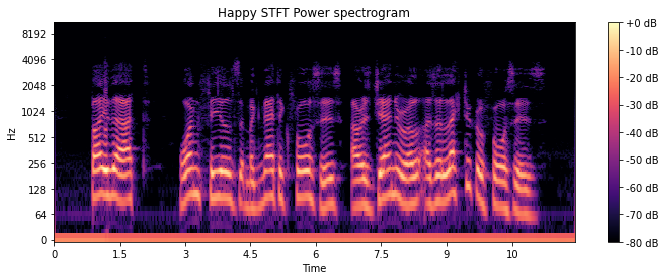

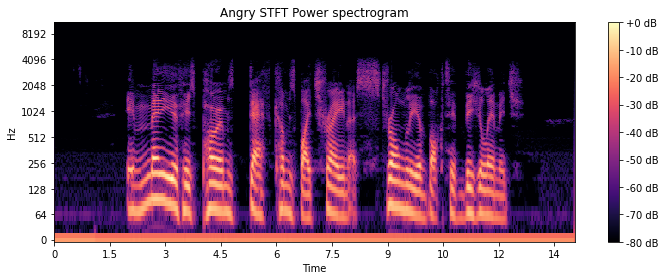

In [461]:
stft_spectrum_matrix = librosa.stft(happy_waveform)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('Happy STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

stft_spectrum_matrix = librosa.stft(angry_waveform)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
plt.title('Angry STFT Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

We're getting somewhere, but we're going to have to go further. We operate under the assumption that features whose interclass differences we can visualize will be good candidates on which to train a neural network. Looks like further transformations on the STFT will yield good features. Since we have a 3 second audio file, STFT spectrograms for these audio samples combine to show the change in frequencies across a 3 second window.

###Mel-Frequency Cepstral Coefficients
We're going to build on the STFT by using the Mel Frequency Cepstral Coefficients (MFCCs) as a feature.
In brief, MFCC is a mathematical method which transforms the power spectrum of an audio signal to a small number of coefficients representing power of the audio signal in a frequency region (a region of pitch) taken w.r.t. time.
<br><br>
In other words, MFC coefficients give us an idea of the changing pitch of an audio signal.

To understand our major feature a little better, we should at least have a vague idea of the math behind it.
MFCC at its core uses STFT to produce audio power spectrums. We then apply triangular, overlapping window functions to the power spectrograms and take the sum of energy in each window which is essentialy a frequency bin. To determine the number and position of window functions, and width of each frequency bin, we map the frequencies of our audio's power spectrograms to the [Mel scale](https://en.wikipedia.org/wiki/Mel_scale), a nonlinear pitch scale representing the perceived pitch in 'mels' of an audio signal w.r.t. its frequency. The motivation for the mel scale is to account for the way human hearing perceives pitch based on frequency ratios rather than absolute differences in frequencies. The window functions/frequency bins we applied in this step are called mel filterbanks.

Now we can take the log of the sum of power in each mel frequency filterbank. Taking the log power of an audio spectrogram produces a cepstrum - more on this a little later.

###### The Discrete Cosine Transform
Finally, we apply the discrete cosine transform [(DCT)](https://en.wikipedia.org/wiki/Discrete_cosine_transform) to the log of power in each filterbank. The DCT carries distinguished advantages: Because triangular window functions overlap, the mel filterbank energies are correlated with each other; DCT decorellates the signals; DCT produces coefficients such that usually only the top few coefficients are necessary to represent a signal with fair accuracy, i.e. a compressed representation. **In this way, DCT is quite similar to PCA** - one key difference being that DCT has an absolute definition while PCA is only defined w.r.t. a dataset. For this reason (and a couple others) DCT sees a _huge_ range of applicability: image and audio data compression (read: internet, wireless tech, medicine) and cryptography are most notable. Our MFC coefficients are then the amplitudes of each DCT-transformed log filterbank power, taken w.r.t. time.

Another way to think about MFCC is as a deconvolution method to identify periodic, or resonant structures within an audio signal's frequency space. We can visualize our MFC coefficients by plotting the coefficients provided by each mel filterbank against time.

I've found for this task that 40 filterbanks producing 40 coefficients provide the best accuracy and quick computation.

You can further explore the Mel-Frequency Cepstral Coefficients from
 [this article.](https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779)

###### Visualize our sample's MFC coefficients w.r.t time:

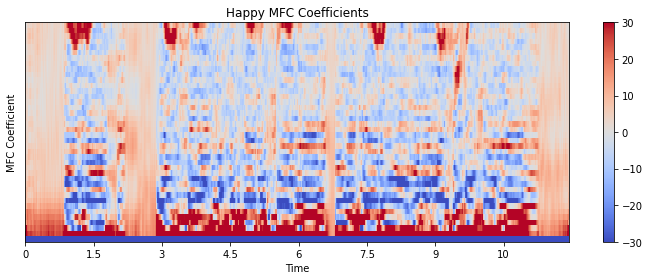

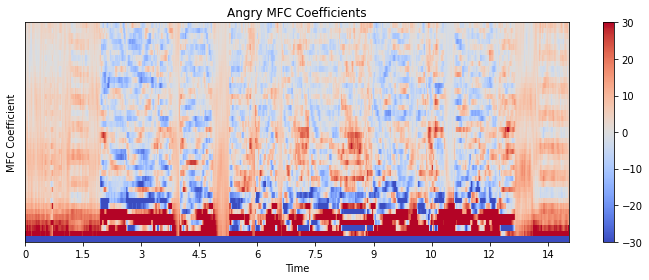

In [462]:
from matplotlib.colors import Normalize
mfc_coefficients = librosa.feature.mfcc(y=happy_waveform, sr=sample_rate, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('Happy MFC Coefficients')
plt.tight_layout()

mfc_coefficients = librosa.feature.mfcc(y=angry_waveform, sr=sample_rate, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('Angry MFC Coefficients')
plt.tight_layout()

**Positive MFCCs correspond to low-frequency regions of the cepstrum, and negative MFFCs to high-frequency.**

**We see the Angry voice has a much greater proportion of positive MFFCs, corresponding to a lower voice pitch compared to the Happy voice. Makes sense - a happy voice carries a lighter tone and a higher pitch.**

##### Quick MFCC Derivation
1. Take the square of magnitudes in spectrograms produced by STFT to produce audio power spectrograms for short overlapping frames of the audio signal, <br>
2. Apply a mel-scale-based transformation, mel filterbanks (triangular window functions) to each STFT power spectrogram and sum the power in each filterbank <br>
3. Take the log of each filterbank power <br>
4. Take the discrete cosine transform of each log power in each STFT frame, giving us the MFC coefficients - our measure of power at various mel frequencies, corresponding to audible pitch. <br>

Wikipedia has a pretty straight-forward explanation of [MFCCs](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum).



### Mel Spectrograms and Mel-Frequency Cepstrums
In deriving our MFCCs, we have also produced an additional feature we can make use of.
When we mapped the frequencies of a power spectrogram to the mel scale, we produced a Mel Frequency Spectrogram -
a simple analog of the power spectrogram with the frequency scale in mels.
We're going to use the Mel Specotrgrogram as a feature of its own.

##### Visualize our sample's Mel spectrogram w.r.t time:

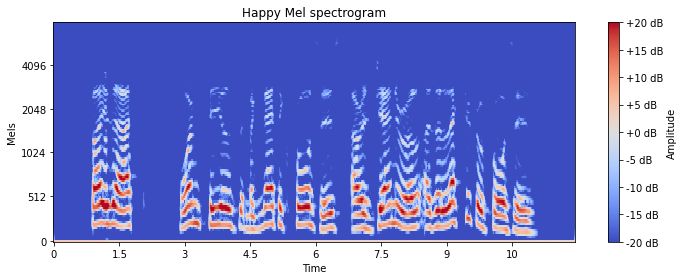

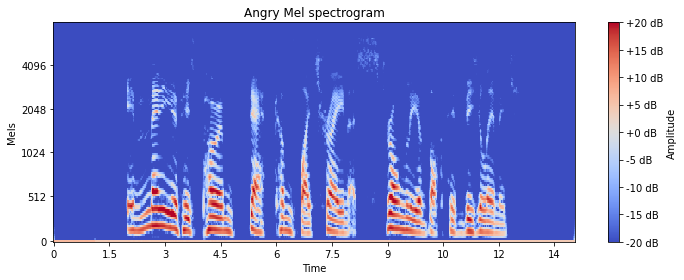

In [463]:
melspectrogram = librosa.feature.melspectrogram(y=happy_waveform, sr=sample_rate, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),y_axis='mel',fmax=8000, x_axis='time', norm=Normalize(vmin=-20,vmax=20))
plt.colorbar(format='%+2.0f dB',label='Amplitude')
plt.ylabel('Mels')
plt.title('Happy Mel spectrogram')
plt.tight_layout()

melspectrogram = librosa.feature.melspectrogram(y=angry_waveform, sr=sample_rate, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),y_axis='mel',fmax=8000, x_axis='time', norm=Normalize(vmin=-20,vmax=20))
plt.colorbar(format='%+2.0f dB',label='Amplitude')
plt.ylabel('Mels')
plt.title('Angry Mel spectrogram')
plt.tight_layout()

**The Angry voice produces sharper transitions between mel frequency peaks compared to the Happy voice, which has smoother pitch transitions. That makes intuitive sense - an Angry voice has sharp transitions while a happy voice is more steady and pleasing to the ears. Mel spectrograms will make another good feature.**

What about the cepstrum? When we took the log of the spectral amplitudes in a Mel-scaled power spectrogram, we could have plotted that result as a time series and produced what is known as a 'mel-frequency cepstrum', now in the 'quefrency' domain, so confusingly named because we have applied a transformation to an audio signal in its frequency domain, but have plotted it as a time series - not quite in the frequency domain, not quite in the time domain. In the cepstrum, we observe a peak wherever there is a periodic element in the original audio signal. We've actually already used the the mel-frequency cepstrum (MFC) as a feature, since that is precisely the source of our MFC coefficients. Again, Wikipedia has a fairly palatable explanation of the [cepstrum](https://en.wikipedia.org/wiki/Cepstrum).

Below is an excellent visualization of the transformations between waveform, spectrogram, mel spectrogram, and MFCCs plotted as time series.
The vertical frame in each graph represents a single STFT frame.<br>



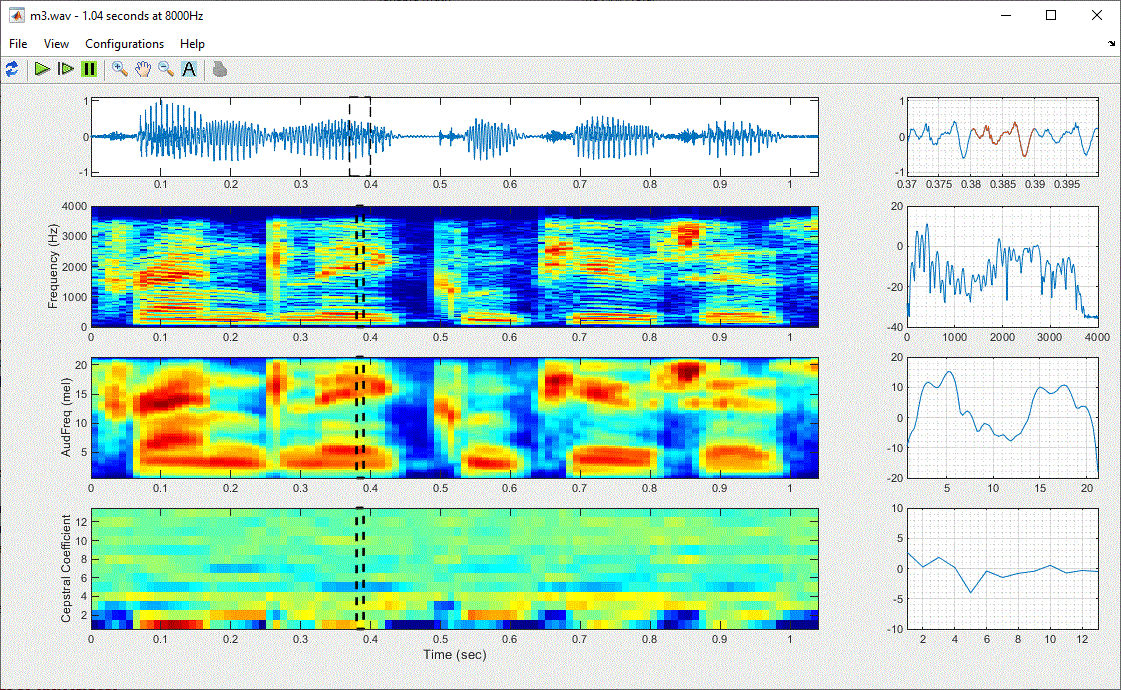

### The Chromagram
To extract an additional feature, we're going to build a chromagram on each power spectrogram computed by STFT. A chromagram is a representation of an audio signal w.r.t. time, mapping audio signal to a pitch class.
Most often, we map to the 12 standard pitch classes (i.e. the musical scale CDEFGAB + 5 semitones gives us 12 pitch classes).
Again, wikipedia has a short and sweet [explanation](https://en.wikipedia.org/wiki/Chroma_feature).


##### Visualize the chromagram for our sample audio:

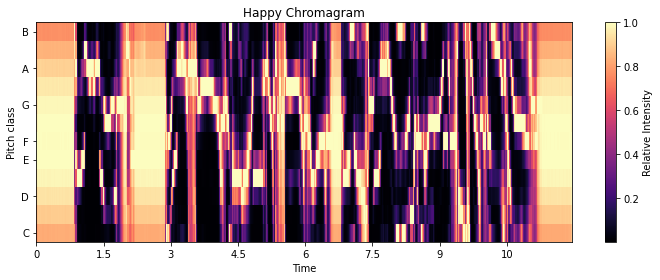

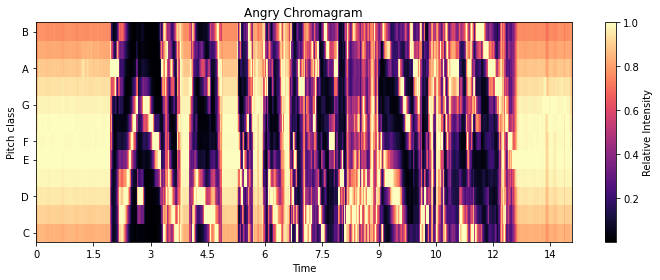

In [464]:
chromagram = librosa.feature.chroma_stft(y=happy_waveform, sr=sample_rate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
plt.colorbar(label='Relative Intensity')
plt.title('Happy Chromagram')
plt.tight_layout()

chromagram = librosa.feature.chroma_stft(y=angry_waveform, sr=sample_rate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
plt.colorbar(label='Relative Intensity')
plt.title('Angry Chromagram')
plt.tight_layout()

In [28]:
print(chromagram.shape)

(12, 363)


**The pitch distribution of the Angry voice has a much lower dispersion compared to the Happy voice, whose pitch has a higher dispersion at any point in time. This makes intuitive sense considering the tone of an angry voice is more intense and "snappy" compared to a happy voice, which is smoother to the ears - here's a good explanation as to why. This should make a good feature.**

### Feature Extraction
We're going to take full advantage of librosa, a Python library enabling audio analysis and feature extraction.
Librosa abstracts away all the math and most of the details of mel spectrorgams, chromagrams, and MFCC.
Although closely related, we're going to take the Mel Spectrogram, MFCC, and chromagrams of each audio file as separate features to try
and have bit more discriminatory power between samples. <br>

Let's build our feature extraction functions to get a chromagram, a mel spectorgram, and MFC coefficients for each of our audio files. Because the chromagram, mel spectrogram and MFCCs are calculated on audio frames produced by STFT, we're going to get a matrix back from each function, so we'll take the mean of those matrices to produce a single feature array for each feature and each audio sample, i.e. 3 feature arrays per audio sample.

**Chromagram**: Will produce 12 features; One for each of 12 pitch classes

**Mel Spectrogram**: Will produce 128 features; We've defined the number of mel frequency bands at n_mels=128

**MFCC**: Will produce 40 MFCCs; I've set the number of coefficients to return at n_mfcc=40 which I found to work well

In [29]:
import librosa

def feature_chromagram(waveform, sample_rate):
    # STFT computed here explicitly; mel spectrogram and MFCC functions do this under the hood
    stft_spectrogram=np.abs(librosa.stft(waveform))
    #print(stft_spectrogram.shape)
    # Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    #print(chromagram.shape)
    return chromagram

def feature_melspectrogram(waveform, sample_rate):
    # Produce the mel spectrogram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # Using 8khz as upper frequency bound should be enough for most speech classification tasks
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000).T,axis=0)
    return melspectrogram

def feature_mfcc(waveform, sample_rate):
    # Compute the MFCCs for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # 40 filterbanks = 40 coefficients
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfc_coefficients

We're going to wrap our feature extraction functions so we only have to load each audio file once. After extracting our 3 audio features as NumPy arrays representing a time series, we're going to
stack them horizontally to create a single feature array.

In [30]:
def get_features(file):
    # load an individual soundfile
     with soundfile.SoundFile(file) as audio:
        waveform = audio.read(dtype="float32")
        sample_rate = audio.samplerate
        # compute features of soundfile
        chromagram = feature_chromagram(waveform, sample_rate)
        melspectrogram = feature_melspectrogram(waveform, sample_rate)
        mfc_coefficients = feature_mfcc(waveform, sample_rate)
        feature_matrix=np.array([])

        # use np.hstack to stack our feature arrays horizontally to create a feature matrix
        feature_matrix = np.hstack((chromagram, melspectrogram, mfc_coefficients))

        return feature_matrix

### Load the Dataset and Compute Features
We have to understand the labelling of the RAVDESS dataset to find the ground truth emotion for each sample.
Each file is labelled with 7 numbers delimited by a "-".
Most of the numbers describe metadata about the audio samples such as their format (video and/or audio),
whether the audio is a song or statement, which of two statements is being read and by which actor.

The third and fourth numbers pertain to the emotional quality of each sample. The third number is in the range of 1-8 with each number representing an emotion.
The fourth number is either 1 or 2, representing normal (1) or strong (2) emotional intensity.

We're going to define a dictionary based on the third number (emotion) and assign an emotion to each number as specified by the RAVDESS dataset:

In [54]:
#Emotions in the RAVDESS dataset
emotions ={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

Finally, let's load our entire dataset and compute the features of each audio file:

In [55]:
import os, glob

def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("data/RAVDESS/Audio_Speech_Actors_01-24/Actor_*/*.wav"):
        file_name=os.path.basename(file)
#         print(file_name)
#         print(file_name.split("-")[2])
        emotion=emotions[(file_name.split("-")[2])]
        #print(emotion)
        features = get_features(file)
        X.append(features)
        y.append(emotion)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{1435} audio samples',end=' ')
      # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)

Compute the feature matrix and read the emotion labels for the entire dataset.
Note that our regressor (independent/explanatory variable), usually denoted X, is named 'features', and our regressand (dependent variable), usually denoted y, is named 'emotions'.

In [56]:
file = glob.glob("data/RAVDESS/Audio_Speech_Actors_01-24/Actor_*/*.wav")[0]
file_name=os.path.basename(file)
file_name.split("-")[2]

'05'

In [57]:
features, emotions = load_data()

03-01-05-01-02-01-16.wav
05
 Processed 1/1435 audio samples 03-01-06-01-02-02-16.wav
06
 Processed 2/1435 audio samples 03-01-06-02-01-02-16.wav
06
 Processed 3/1435 audio samples 03-01-05-02-01-01-16.wav
05
 Processed 4/1435 audio samples 03-01-07-01-01-01-16.wav
07
 Processed 5/1435 audio samples 03-01-04-01-01-02-16.wav
04
 Processed 6/1435 audio samples 03-01-04-02-02-02-16.wav
04
 Processed 7/1435 audio samples 03-01-07-02-02-01-16.wav
07
 Processed 8/1435 audio samples 03-01-08-02-02-01-16.wav
08
 Processed 9/1435 audio samples 03-01-08-01-01-01-16.wav
08
 Processed 10/1435 audio samples 03-01-03-02-02-02-16.wav
03
 Processed 11/1435 audio samples 03-01-03-01-01-02-16.wav
03
 Processed 12/1435 audio samples 03-01-02-02-01-01-16.wav
02
 Processed 13/1435 audio samples 03-01-01-01-02-02-16.wav
01
 Processed 14/1435 audio samples 03-01-02-01-02-01-16.wav
02
 Processed 15/1435 audio samples 03-01-03-02-01-01-16.wav
03
 Processed 16/1435 audio samples 03-01-03-01-02-01-16.wav
03
 Proc

 Processed 136/1435 audio samples 03-01-06-01-02-01-18.wav
06
 Processed 137/1435 audio samples 03-01-06-02-01-01-18.wav
06
 Processed 138/1435 audio samples 03-01-05-02-01-02-18.wav
05
 Processed 139/1435 audio samples 03-01-07-01-01-02-18.wav
07
 Processed 140/1435 audio samples 03-01-04-01-01-01-18.wav
04
 Processed 141/1435 audio samples 03-01-04-02-02-01-18.wav
04
 Processed 142/1435 audio samples 03-01-07-02-02-02-18.wav
07
 Processed 143/1435 audio samples 03-01-08-02-02-02-18.wav
08
 Processed 144/1435 audio samples 03-01-08-01-01-02-18.wav
08
 Processed 145/1435 audio samples 03-01-03-02-02-01-18.wav
03
 Processed 146/1435 audio samples 03-01-03-01-01-01-18.wav
03
 Processed 147/1435 audio samples 03-01-02-02-01-02-18.wav
02
 Processed 148/1435 audio samples 03-01-01-01-02-01-18.wav
01
 Processed 149/1435 audio samples 03-01-02-01-02-02-18.wav
02
 Processed 150/1435 audio samples 03-01-04-02-01-01-18.wav
04
 Processed 151/1435 audio samples 03-01-07-02-01-02-18.wav
07
 Process

 Processed 270/1435 audio samples 03-01-02-02-02-02-21.wav
02
 Processed 271/1435 audio samples 03-01-03-01-02-01-21.wav
03
 Processed 272/1435 audio samples 03-01-03-02-01-01-21.wav
03
 Processed 273/1435 audio samples 03-01-08-01-02-02-21.wav
08
 Processed 274/1435 audio samples 03-01-08-02-01-02-21.wav
08
 Processed 275/1435 audio samples 03-01-04-02-01-01-21.wav
04
 Processed 276/1435 audio samples 03-01-07-02-01-02-21.wav
07
 Processed 277/1435 audio samples 03-01-07-01-02-02-21.wav
07
 Processed 278/1435 audio samples 03-01-04-01-02-01-21.wav
04
 Processed 279/1435 audio samples 03-01-06-02-02-01-21.wav
06
 Processed 280/1435 audio samples 03-01-05-02-02-02-21.wav
05
 Processed 281/1435 audio samples 03-01-05-01-01-02-21.wav
05
 Processed 282/1435 audio samples 03-01-06-01-01-01-21.wav
06
 Processed 283/1435 audio samples 03-01-08-01-01-01-21.wav
08
 Processed 284/1435 audio samples 03-01-08-02-02-01-21.wav
08
 Processed 285/1435 audio samples 03-01-07-02-02-01-21.wav
07
 Process

 Processed 404/1435 audio samples 03-01-01-01-01-02-10.wav
01
 Processed 405/1435 audio samples 03-01-02-02-02-01-10.wav
02
 Processed 406/1435 audio samples 03-01-03-01-02-02-10.wav
03
 Processed 407/1435 audio samples 03-01-03-02-01-02-10.wav
03
 Processed 408/1435 audio samples 03-01-07-02-01-01-10.wav
07
 Processed 409/1435 audio samples 03-01-04-02-01-02-10.wav
04
 Processed 410/1435 audio samples 03-01-04-01-02-02-10.wav
04
 Processed 411/1435 audio samples 03-01-07-01-02-01-10.wav
07
 Processed 412/1435 audio samples 03-01-05-02-02-01-10.wav
05
 Processed 413/1435 audio samples 03-01-06-02-02-02-10.wav
06
 Processed 414/1435 audio samples 03-01-06-01-01-02-10.wav
06
 Processed 415/1435 audio samples 03-01-05-01-01-01-10.wav
05
 Processed 416/1435 audio samples 03-01-08-01-02-01-10.wav
08
 Processed 417/1435 audio samples 03-01-08-02-01-01-10.wav
08
 Processed 418/1435 audio samples 03-01-07-02-02-01-17.wav
07
 Processed 419/1435 audio samples 03-01-04-02-02-02-17.wav
04
 Process

 Processed 537/1435 audio samples 03-01-08-02-01-01-04.wav
08
 Processed 538/1435 audio samples 03-01-04-02-02-02-03.wav
04
 Processed 539/1435 audio samples 03-01-07-02-02-01-03.wav
07
 Processed 540/1435 audio samples 03-01-07-01-01-01-03.wav
07
 Processed 541/1435 audio samples 03-01-04-01-01-02-03.wav
04
 Processed 542/1435 audio samples 03-01-06-02-01-02-03.wav
06
 Processed 543/1435 audio samples 03-01-05-02-01-01-03.wav
05
 Processed 544/1435 audio samples 03-01-05-01-02-01-03.wav
05
 Processed 545/1435 audio samples 03-01-06-01-02-02-03.wav
06
 Processed 546/1435 audio samples 03-01-08-01-01-01-03.wav
08
 Processed 547/1435 audio samples 03-01-08-02-02-01-03.wav
08
 Processed 548/1435 audio samples 03-01-01-01-02-02-03.wav
01
 Processed 549/1435 audio samples 03-01-02-01-02-01-03.wav
02
 Processed 550/1435 audio samples 03-01-02-02-01-01-03.wav
02
 Processed 551/1435 audio samples 03-01-03-01-01-02-03.wav
03
 Processed 552/1435 audio samples 03-01-03-02-02-02-03.wav
03
 Process

 Processed 670/1435 audio samples 03-01-05-01-02-01-05.wav
05
 Processed 671/1435 audio samples 03-01-08-01-01-01-05.wav
08
 Processed 672/1435 audio samples 03-01-08-02-02-01-05.wav
08
 Processed 673/1435 audio samples 03-01-04-02-01-01-05.wav
04
 Processed 674/1435 audio samples 03-01-07-02-01-02-05.wav
07
 Processed 675/1435 audio samples 03-01-07-01-02-02-05.wav
07
 Processed 676/1435 audio samples 03-01-04-01-02-01-05.wav
04
 Processed 677/1435 audio samples 03-01-06-02-02-01-05.wav
06
 Processed 678/1435 audio samples 03-01-05-02-02-02-05.wav
05
 Processed 679/1435 audio samples 03-01-05-01-01-02-05.wav
05
 Processed 680/1435 audio samples 03-01-06-01-01-01-05.wav
06
 Processed 681/1435 audio samples 03-01-08-01-02-02-05.wav
08
 Processed 682/1435 audio samples 03-01-08-02-01-02-05.wav
08
 Processed 683/1435 audio samples 03-01-01-01-01-01-05.wav
01
 Processed 684/1435 audio samples 03-01-02-01-01-02-05.wav
02
 Processed 685/1435 audio samples 03-01-02-02-02-02-05.wav
02
 Process

 Processed 804/1435 audio samples 03-01-04-01-02-01-15.wav
04
 Processed 805/1435 audio samples 03-01-04-02-01-01-15.wav
04
 Processed 806/1435 audio samples 03-01-07-02-01-02-15.wav
07
 Processed 807/1435 audio samples 03-01-01-01-02-01-15.wav
01
 Processed 808/1435 audio samples 03-01-02-01-02-02-15.wav
02
 Processed 809/1435 audio samples 03-01-02-02-01-02-15.wav
02
 Processed 810/1435 audio samples 03-01-03-01-01-01-15.wav
03
 Processed 811/1435 audio samples 03-01-03-02-02-01-15.wav
03
 Processed 812/1435 audio samples 03-01-08-01-01-02-15.wav
08
 Processed 813/1435 audio samples 03-01-08-02-02-02-15.wav
08
 Processed 814/1435 audio samples 03-01-04-02-02-01-15.wav
04
 Processed 815/1435 audio samples 03-01-07-02-02-02-15.wav
07
 Processed 816/1435 audio samples 03-01-07-01-01-02-15.wav
07
 Processed 817/1435 audio samples 03-01-04-01-01-01-15.wav
04
 Processed 818/1435 audio samples 03-01-06-02-01-01-15.wav
06
 Processed 819/1435 audio samples 03-01-05-02-01-02-15.wav
05
 Process

 Processed 938/1435 audio samples 03-01-02-01-01-02-24.wav
02
 Processed 939/1435 audio samples 03-01-02-02-02-02-24.wav
02
 Processed 940/1435 audio samples 03-01-03-01-02-01-24.wav
03
 Processed 941/1435 audio samples 03-01-03-02-01-01-24.wav
03
 Processed 942/1435 audio samples 03-01-02-01-02-01-24.wav
02
 Processed 943/1435 audio samples 03-01-01-01-02-02-24.wav
01
 Processed 944/1435 audio samples 03-01-02-02-01-01-24.wav
02
 Processed 945/1435 audio samples 03-01-03-01-01-02-24.wav
03
 Processed 946/1435 audio samples 03-01-03-02-02-02-24.wav
03
 Processed 947/1435 audio samples 03-01-07-02-02-01-24.wav
07
 Processed 948/1435 audio samples 03-01-04-02-02-02-24.wav
04
 Processed 949/1435 audio samples 03-01-04-01-01-02-24.wav
04
 Processed 950/1435 audio samples 03-01-07-01-01-01-24.wav
07
 Processed 951/1435 audio samples 03-01-05-02-01-01-24.wav
05
 Processed 952/1435 audio samples 03-01-06-02-01-02-24.wav
06
 Processed 953/1435 audio samples 03-01-06-01-02-02-24.wav
06
 Process

 Processed 1070/1435 audio samples 03-01-04-02-01-02-14.wav
04
 Processed 1071/1435 audio samples 03-01-07-02-01-01-14.wav
07
 Processed 1072/1435 audio samples 03-01-03-02-01-02-14.wav
03
 Processed 1073/1435 audio samples 03-01-03-01-02-02-14.wav
03
 Processed 1074/1435 audio samples 03-01-02-02-02-01-14.wav
02
 Processed 1075/1435 audio samples 03-01-01-01-01-02-14.wav
01
 Processed 1076/1435 audio samples 03-01-02-01-01-01-14.wav
02
 Processed 1077/1435 audio samples 03-01-03-02-02-02-13.wav
03
 Processed 1078/1435 audio samples 03-01-03-01-01-02-13.wav
03
 Processed 1079/1435 audio samples 03-01-02-02-01-01-13.wav
02
 Processed 1080/1435 audio samples 03-01-01-01-02-02-13.wav
01
 Processed 1081/1435 audio samples 03-01-02-01-02-01-13.wav
02
 Processed 1082/1435 audio samples 03-01-08-02-02-01-13.wav
08
 Processed 1083/1435 audio samples 03-01-08-01-01-01-13.wav
08
 Processed 1084/1435 audio samples 03-01-05-01-02-01-13.wav
05
 Processed 1085/1435 audio samples 03-01-06-01-02-02-13

 Processed 1202/1435 audio samples 03-01-08-02-02-01-07.wav
08
 Processed 1203/1435 audio samples 03-01-08-01-01-01-07.wav
08
 Processed 1204/1435 audio samples 03-01-06-01-02-02-07.wav
06
 Processed 1205/1435 audio samples 03-01-05-01-02-01-07.wav
05
 Processed 1206/1435 audio samples 03-01-05-02-01-01-07.wav
05
 Processed 1207/1435 audio samples 03-01-06-02-01-02-07.wav
06
 Processed 1208/1435 audio samples 03-01-04-01-01-02-07.wav
04
 Processed 1209/1435 audio samples 03-01-07-01-01-01-07.wav
07
 Processed 1210/1435 audio samples 03-01-07-02-02-01-07.wav
07
 Processed 1211/1435 audio samples 03-01-04-02-02-02-07.wav
04
 Processed 1212/1435 audio samples 03-01-08-02-01-02-07.wav
08
 Processed 1213/1435 audio samples 03-01-08-01-02-02-07.wav
08
 Processed 1214/1435 audio samples 03-01-05-01-01-02-07.wav
05
 Processed 1215/1435 audio samples 03-01-06-01-01-01-07.wav
06
 Processed 1216/1435 audio samples 03-01-06-02-02-01-07.wav
06
 Processed 1217/1435 audio samples 03-01-05-02-02-02-07

 Processed 1333/1435 audio samples 03-01-03-01-02-01-01.wav
03
 Processed 1334/1435 audio samples 03-01-02-02-02-02-01.wav
02
 Processed 1335/1435 audio samples 03-01-01-01-01-01-01.wav
01
 Processed 1336/1435 audio samples 03-01-08-02-01-02-01.wav
08
 Processed 1337/1435 audio samples 03-01-06-01-01-01-01.wav
06
 Processed 1338/1435 audio samples 03-01-05-01-01-02-01.wav
05
 Processed 1339/1435 audio samples 03-01-05-02-02-02-01.wav
05
 Processed 1340/1435 audio samples 03-01-06-02-02-01-01.wav
06
 Processed 1341/1435 audio samples 03-01-04-01-02-01-01.wav
04
 Processed 1342/1435 audio samples 03-01-07-01-02-02-01.wav
07
 Processed 1343/1435 audio samples 03-01-07-02-01-02-01.wav
07
 Processed 1344/1435 audio samples 03-01-04-02-01-01-01.wav
04
 Processed 1345/1435 audio samples 03-01-02-01-02-02-01.wav
02
 Processed 1346/1435 audio samples 03-01-01-01-02-01-01.wav
01
 Processed 1347/1435 audio samples 03-01-02-02-01-02-01.wav
02
 Processed 1348/1435 audio samples 03-01-03-01-01-01-01

In [58]:
features

array([[ 0.55224496,  0.5043383 ,  0.5127785 , ...,  3.361054  ,
         2.0862405 ,  0.37651896],
       [ 0.55073225,  0.5084845 ,  0.46680954, ...,  0.37856358,
        -0.33807388, -0.46324086],
       [ 0.67276764,  0.60145074,  0.5483175 , ...,  0.5810056 ,
        -2.0914624 , -1.899596  ],
       ...,
       [ 0.6280229 ,  0.5966044 ,  0.64393467, ...,  0.84450173,
        -0.10833915,  2.0370529 ],
       [ 0.6301627 ,  0.6522051 ,  0.6373069 , ...,  2.2524035 ,
         2.5373688 ,  3.869971  ],
       [ 0.6197045 ,  0.6394461 ,  0.65009934, ...,  0.5197239 ,
         1.1816257 ,  2.576108  ]], dtype=float32)

Let's see what the features we extracted look like:

In [59]:
print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features) # make it pretty for display
features_df


Audio samples represented: 1435
Numerical features extracted per sample: 180


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.552245,0.504338,0.512779,0.550540,0.572176,0.615567,0.603708,0.573230,0.593454,0.603834,...,-3.543537,-0.912676,-1.747537,-2.299447,-0.025205,2.449470,2.116510,3.361054,2.086241,0.376519
1,0.550732,0.508484,0.466810,0.438485,0.428218,0.445352,0.444528,0.444478,0.500419,0.551673,...,2.333152,3.619088,0.793563,0.743431,0.660723,-0.254914,-0.967536,0.378564,-0.338074,-0.463241
2,0.672768,0.601451,0.548317,0.477806,0.453192,0.516665,0.570100,0.599750,0.647746,0.692148,...,0.283253,0.218117,-1.928165,-2.486516,-0.530146,0.354905,0.463640,0.581006,-2.091462,-1.899596
3,0.602309,0.605448,0.558788,0.529441,0.546190,0.568049,0.566027,0.523464,0.526789,0.552809,...,2.176565,3.904047,0.980935,1.160923,-0.694902,-0.969963,-0.234802,0.941700,0.695973,0.430566
4,0.556555,0.503434,0.473118,0.479222,0.495470,0.522489,0.532196,0.540681,0.545616,0.512521,...,-1.306031,0.050261,-0.992539,-0.213367,-0.351018,-1.462262,-2.454565,-1.044801,-0.298479,0.118208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,0.664177,0.633587,0.590743,0.601933,0.623831,0.643299,0.671203,0.668196,0.683204,0.658824,...,5.234397,5.000974,4.120271,3.053777,2.119890,2.965642,2.442994,2.014850,3.167833,4.008449
1431,0.697806,0.658317,0.614802,0.639169,0.717383,0.743908,0.781170,0.749796,0.722322,0.715267,...,-1.211284,0.060299,-1.140081,0.446976,0.614657,0.430341,0.332445,-0.197219,0.797523,2.606972
1432,0.628023,0.596604,0.643935,0.655228,0.659819,0.725635,0.808151,0.814369,0.771093,0.722508,...,-1.125915,0.213711,-1.729092,0.776150,0.564957,2.507702,0.997836,0.844502,-0.108339,2.037053
1433,0.630163,0.652205,0.637307,0.684746,0.764458,0.795282,0.819000,0.802949,0.774911,0.734925,...,-2.221260,-0.709731,-1.652230,-1.931097,-1.620286,1.130693,0.274002,2.252403,2.537369,3.869971


We have a matrix of dim 1435 x 180. Looks good - 1435 audio samples, one per row, with a series of
180 numerical features for each sample.

**Each of the 1435 feature arrays has 180 features composed of 12 chromagram pitch classes + 128 mel spectrogram bands + 40 MFC coefficients.**

Let's see the class balance of our dataset:

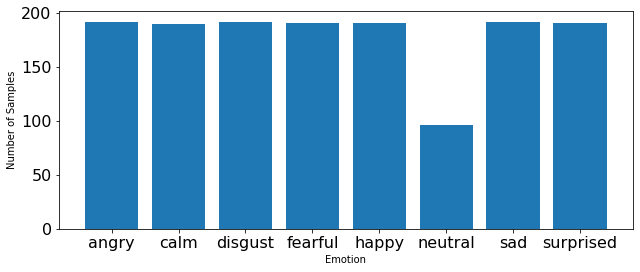

In [60]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(emotions, return_counts=True)
plt.bar(x=range(8), height=count)
plt.xticks(ticks=range(8), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

**Great, the classes appear to be balanced. That makes the task easier.** All emotions _except_ the neutral class have a "strong" intensity so there are half as many neutral samples. That might have an impact.

### Feature Scaling
To properly train most machine learning models on _most_ datasets, we first need to scale our features. **This is crucial for models which compute distances between data, and especially critical for DNNs**: If there is a difference in the variance of features simply because of their possible range of values, then a model will learn that the features with the greatest variance are the most important. However, **differences in the variance of unscaled features belonging to different and unknown distributions is an inappropriate measure of importance.** Let's check our features' properties:

In [466]:
# We would usually use df.describe(), but it provides a bit of a mess of information we don't need at the moment.
def print_features(df):
    # Check chromagram feature values
    features_df_chromagram = df.loc[:,:11]
    chroma_min = features_df_chromagram.min().min()
    chroma_max = features_df_chromagram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    chroma_mean = features_df_chromagram.stack().mean()
    chroma_stdev = features_df_chromagram.stack().std()
    print(f'12 Chromagram features:       \
    min = {chroma_min:.3f}, \
    max = {chroma_max:.3f}, \
    mean = {chroma_mean:.3f}, \
    deviation = {chroma_stdev:.3f}')

    # Check mel spectrogram feature values
    features_df_melspectrogram = df.loc[:,12:139]
    mel_min = features_df_melspectrogram.min().min()
    mel_max = features_df_melspectrogram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mel_mean = features_df_melspectrogram.stack().mean()
    mel_stdev = features_df_melspectrogram.stack().std()
    print(f'\n128 Mel Spectrogram features: \
    min = {mel_min:.3f}, \
    max = {mel_max:.3f}, \
    mean = {mel_mean:.3f}, \
    deviation = {mel_stdev:.3f}')

    # Check MFCC feature values
    features_df_mfcc = df.loc[:,140:179]
    mfcc_min = features_df_mfcc.min().min()
    mfcc_max = features_df_mfcc.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mfcc_mean = features_df_mfcc.stack().mean()
    mfcc_stdev = features_df_mfcc.stack().std()
    print(f'\n40 MFCC features:             \
    min = {mfcc_min:.3f},\
    max = {mfcc_max:.3f},\
    mean = {mfcc_mean:.3f},\
    deviation = {mfcc_stdev:.3f}')

print('\033[1m'+'Original Features:\n'+'\033[0m')
print_features(features_df)

Original Features:

12 Chromagram features:           min = 0.173,     max = 0.932,     mean = 0.618,     deviation = 0.114

128 Mel Spectrogram features:     min = 0.000,     max = 1005.190,     mean = 1.326,     deviation = 12.153

40 MFCC features:                 min = -873.242,    max = 169.425,    mean = -11.454,    deviation = 88.742


**There's an obvious imbalance in the variance our features; Our features indeed belong to very different distributions:** our MFC coefficients' deviation is greater than the other features by orders of magnitude. That does not mean MFC coefficients are the most important feature, but rather it is a property of the way they are computed.  We will certainly need to scale this feature set.

We have the choice of sklearn's StandardScaler and MinMaxScaler. Standard scaling subtracts the mean of each feature and divides it by the standard deviation of that feature, producing features with mean at zero and unit variance - that is, a variance and standard deviation of 1. Min-Max scaling transforms each feature to be within a bounded interval that we specify.

In practice, **MinMax scaling is especially useful when we know our features should be in a bounded interval**, such as pixel values in [0,255], while **standard scaling is perhaps more practical for features with unknown distributions** because centering the features at zero-mean with a standard deviation of 1 means extreme values will have less of an impact on the model's learned weights, i.e. the model is less sensitive to outliers.

We'll create MinMax scaled features as well so we can give them a try later on to confirm that standard scaling is better in the absence of knowledge on the appropriate distribution for a dataset's features.

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
features_scaled = features
features_scaled = scaler.fit_transform(features_scaled)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
features_minmax = features
features_minmax = scaler.fit_transform(features_minmax)

Make sure our features are properly scaled:

In [63]:
print('\033[1m'+'Standard Scaling:\n'+'\033[0m')
features_scaled_df = pd.DataFrame(features_scaled)
print_features(features_scaled_df)

print('\n\n\033[1m'+'MinMax Scaling:\n'+'\033[0m')
features_minmax_df = pd.DataFrame(features_minmax)
print_features(features_minmax_df)

Standard Scaling:

12 Chromagram features:           min = -3.957,     max = 2.645,     mean = 0.000,     deviation = 1.000

128 Mel Spectrogram features:     min = -0.475,     max = 36.480,     mean = 0.000,     deviation = 1.000

40 MFCC features:                 min = -4.209,    max = 6.240,    mean = -0.000,    deviation = 1.000


MinMax Scaling:

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.611,     deviation = 0.181

128 Mel Spectrogram features:     min = 0.000,     max = 1.000,     mean = 0.015,     deviation = 0.061

40 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.406,    deviation = 0.166


Perfect. Zero mean and unit variance for standard scaling and in the range [0,1] for MinMax scaling - a default when we don't specify values. We can now move on to building predictive models for these features.